In [ ]:
# Blending images: Done using addWeighted func that uses both images to combine them. To blend image we use new_pixel= α x pixel_1 + β x pixel_2 + γ

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
path=r'D:/Study/Python/openCV/Experiments/DATA/'

In [3]:
img1=cv2.imread(path+'dog_backpack.png')
img1=cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img2=cv2.imread(path+'watermark_no_copy.png')
img2=cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

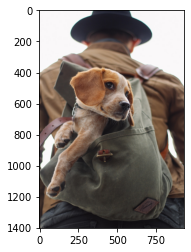

In [4]:
plt.imshow(img1)

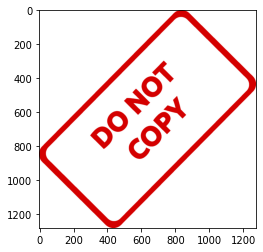

In [5]:
plt.imshow(img2)

In [6]:
# Blending image of same size

img1 = cv2.resize(img1,(1200,1200))
img2 = cv2.resize(img2,(1200,1200))


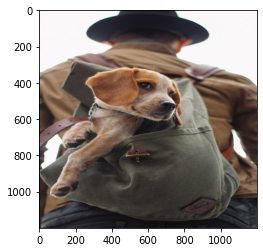

In [7]:
plt.imshow(img1)

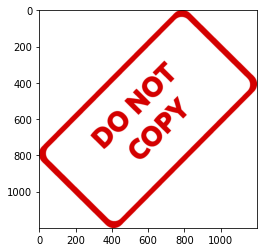

In [8]:
plt.imshow(img2)

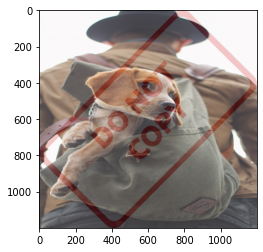

In [9]:
blended = cv2.addWeighted(src1=img1,alpha=0.8,src2=img2,beta=0.2,gamma=0)
plt.imshow(blended)

In [10]:
# Overlay small image on top of a larger image without blending, Numpy reassignment

img1=cv2.imread(path+'dog_backpack.png')
img1=cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img2=cv2.imread(path+'watermark_no_copy.png')
img2=cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

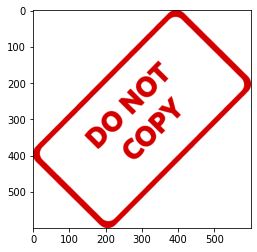

In [11]:
img2=cv2.resize(img2,(600,600))
plt.imshow(img2)

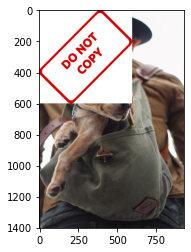

In [12]:
large_img=img1
small_img=img2

x_offset = 0
y_offset = 0

x_end = x_offset+small_img.shape[1]
y_end = y_offset+small_img.shape[0]

large_img[y_offset:y_end,x_offset:x_end]=small_img
plt.imshow(large_img)

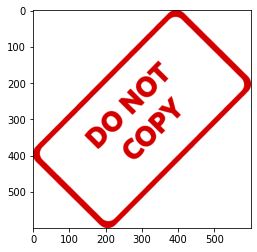

In [13]:
# Create mask and then blend the images (looks like its kinda complex)

img1=cv2.imread(path+'dog_backpack.png')
img1=cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img2=cv2.imread(path+'watermark_no_copy.png')
img2=cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

img2=cv2.resize(img2,(600,600))
plt.imshow(img2)

In [14]:
img1.shape

(1401, 934, 3)

In [15]:
x_offset = 934-600 # 600 is the lenth of the smaller img
y_offset = 1401 -600

rows,colmns,chnls=img2.shape

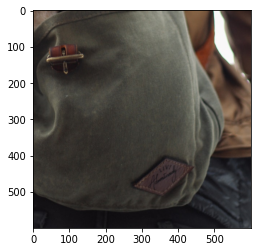

In [16]:
# roi-> region of inerest in larger img
roi=img1[y_offset:1401,x_offset:934]
plt.imshow(roi)

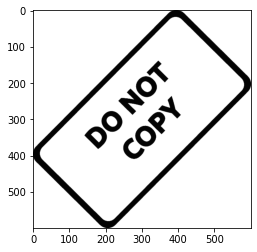

In [17]:
img2gray=cv2.cvtColor(img2,cv2.COLOR_RGB2GRAY)
plt.imshow(img2gray,'gray')

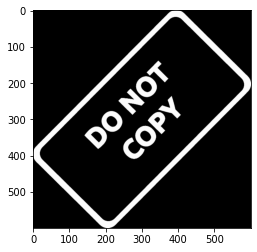

In [18]:
mask_inv=cv2.bitwise_not(img2gray)
plt.imshow(mask_inv,'gray')

In [19]:
## fixing missing color channel
white_bg=np.full(img2.shape,255,dtype="uint8")
white_bg.shape

(600, 600, 3)

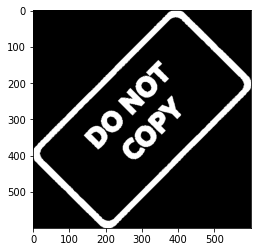

In [20]:
background=cv2.bitwise_or(white_bg,white_bg,mask=mask_inv)
plt.imshow(background)

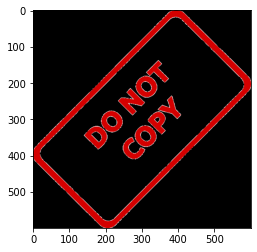

In [21]:
foreground=cv2.bitwise_or(img2,img2,mask=mask_inv)
plt.imshow(foreground)

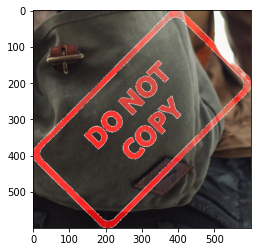

In [22]:
final_roi=cv2.bitwise_or(roi,foreground)
plt.imshow(final_roi)

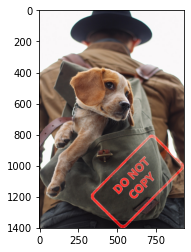

In [23]:
large_img=img1
small_img=final_roi

large_img[y_offset:y_offset+small_img.shape[0],x_offset:x_offset+small_img.shape[1]]=small_img
plt.imshow(large_img)